# Citibike Feature Enginereed Data: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import plotly.graph_objects as go

## Import and load data

In [2]:
cb_raw = pd.read_csv('../../data/02_processed/citibike_feature_engineered_final.csv', 
                     parse_dates=['starttime', 'stoptime','birthyear'])

In [3]:
cb = cb_raw.copy()

## Helper functions

In [4]:
def show_all(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', len(df))
    print(df)
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_rows')

## Inspect data frame

Get dimensions of data frame and datatypes of each feature:

In [5]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015035 entries, 0 to 4015034
Data columns (total 37 columns):
bikeid                   int64
birthyear                datetime64[ns]
endstationid             int64
endstationlatitude       float64
endstationlongitude      float64
endstationname           object
gender                   int64
startstationid           int64
startstationlatitude     float64
startstationlongitude    float64
startstationname         object
starttime                datetime64[ns]
stoptime                 datetime64[ns]
tripduration             int64
usertype                 object
vicentydistance          float64
manhdistance             float64
startmonth               int64
stopmonth                int64
startdayname             object
startday                 int64
stopdayname              object
stopday                  int64
startdaytype             object
enddaytype               object
starthour                int64
endhour                  int64
star

Randomly sample five observations:

In [6]:
cb.sample(n=5)

,bikeid,birthyear,endstationid,endstationlatitude,endstationlongitude,endstationname,gender,startstationid,startstationlatitude,startstationlongitude,...,startrushhour,endrushhour,starttimeofday,endtimeofday,age_at_ride,age_group,startneighborhood,endneighborhood,startboro,endboro
3225211,18538,1980-01-01,468,40.765265,-73.981923,Broadway & W 55 St,1,72,40.767272,-73.993929,...,Morning Rush,Morning Rush,Morning (6AM-11:59PM),Morning (6AM-11:59PM),35,30s,Hell's Kitchen,Theater District,Manhattan,Manhattan
754951,16185,1970-01-01,442,40.746647,-73.993915,W 27 St & 7 Ave,1,264,40.707065,-74.007319,...,Afternoon Rush,Afternoon Rush,Evening (5-7:59PM),Evening (5-7:59PM),45,40s,Financial District,Chelsea,Manhattan,Manhattan
2337244,25207,1987-01-01,499,40.769155,-73.981918,Broadway & W 60 St,1,3518,40.808442,-73.945209,...,Morning Rush,Morning Rush,Morning (6AM-11:59PM),Morning (6AM-11:59PM),31,30s,Harlem,Columbus Circle,Manhattan,Manhattan
3707222,28947,1988-01-01,3341,40.795346,-73.961860,Central Park West & W 102 St,2,3143,40.776321,-73.964274,...,Afternoon Rush,Afternoon Rush,Afternoon (12PM-4:59PM),Afternoon (12PM-4:59PM),31,30s,Upper East Side,Manhattan Valley,Manhattan,Manhattan
1904200,20843,1968-01-01,466,40.743954,-73.991449,W 25 St & 6 Ave,1,284,40.739017,-74.002638,...,Afternoon Off-Peak,Afternoon Off-Peak,Afternoon (12PM-4:59PM),Afternoon (12PM-4:59PM),46,40s,West Village,Chelsea,Manhattan,Manhattan


Check for missing values – there should be none:

In [7]:
cb.isnull().sum()

bikeid                   0
birthyear                0
endstationid             0
endstationlatitude       0
endstationlongitude      0
endstationname           0
gender                   0
startstationid           0
startstationlatitude     0
startstationlongitude    0
startstationname         0
starttime                0
stoptime                 0
tripduration             0
usertype                 0
vicentydistance          0
manhdistance             0
startmonth               0
stopmonth                0
startdayname             0
startday                 0
stopdayname              0
stopday                  0
startdaytype             0
enddaytype               0
starthour                0
endhour                  0
startrushhour            0
endrushhour              0
starttimeofday           0
endtimeofday             0
age_at_ride              0
age_group                0
startneighborhood        0
endneighborhood          0
startboro                0
endboro                  0
d

## Data preprocessing

### Define features

Define numerical features:

In [8]:
map_feat = ['endstationlatitude','endstationlongitude','startstationlatitude','startstationlongitude']
datetime_feat = ['birthyear','starttime', 'stoptime']
cont_feat = map_feat + datetime_feat + ['tripduration']

Define categorical features:

In [9]:
num_nom_feat = ['bikeid','endstationid','startstationid','gender','age_at_ride','startday']
cat_nom_feat = ['endstationname','startstationname','usertype',
               'startneighborhood','startboro','endneighborhood','endboro',
               'startdayname','stopdayname','startdaytype','enddaytype',
               'startrushhour','endrushhour','starttimeofday','endtimeofday',
               'age_group']

### Perform datatype conversions

Convert to datetime format:

In [10]:
cb['birthyear'] = pd.to_datetime(cb.birthyear, format='%Y')

Convert features to `float16` or `int16` to reduce memory:

In [11]:
float_to_int = ['startstationid','endstationid','tripduration','bikeid','gender']

cb[float_to_int] = cb[float_to_int].apply(lambda x: x.astype('int16'))

In [12]:
int64_to_int16 = ['startmonth','stopmonth','startday','stopday','starthour','endhour','age_at_ride']

cb[int64_to_int16] = cb[int64_to_int16].apply(lambda x: x.astype('int16'))

In [13]:
cb['vicentydistance'] = cb['vicentydistance'].astype('float16')
cb['manhdistance'] = cb['manhdistance'].astype('float16')
# cb[map_feat] = cb[map_feat].astype('float16')

Convert untreated nominal features to categorical datatype to reduce memory:

In [14]:
cb[cat_nom_feat] = cb[cat_nom_feat].apply(lambda x: x.astype('category'))

Check for successful datatype conversion and reduction in memory:

In [15]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015035 entries, 0 to 4015034
Data columns (total 37 columns):
bikeid                   int16
birthyear                datetime64[ns]
endstationid             int16
endstationlatitude       float64
endstationlongitude      float64
endstationname           category
gender                   int16
startstationid           int16
startstationlatitude     float64
startstationlongitude    float64
startstationname         category
starttime                datetime64[ns]
stoptime                 datetime64[ns]
tripduration             int16
usertype                 category
vicentydistance          float16
manhdistance             float16
startmonth               int16
stopmonth                int16
startdayname             category
startday                 int16
stopdayname              category
stopday                  int16
startdaytype             category
enddaytype               category
starthour                int16
endhour              

## Feature engineering

Create new feature to get a sense of flow between boroughs:

In [16]:
boro_plus_dict = {'Manhattan': 'Manhattan', 
                  'Brooklyn': 'Outer Borough',
                  'Queens': 'Outer Borough', 
                  'Jersey City': 'Tri-State Area'}

In [17]:
cb['start_boro_flow'] = cb.startboro.map(boro_plus_dict)
cb['end_boro_flow'] = cb.endboro.map(boro_plus_dict)

In [18]:
# cb['inflow'] = cb['bikeid']
# cb['outflow'] = 

Reorder time feature:

In [19]:
cb['startrushhour'].cat.set_categories(['Morning Off-Peak','Morning Rush','Afternoon Off-Peak',
                                       'Afternoon Rush','Evening Off-Peak'],inplace=True)

In [20]:
cb['endrushhour'].cat.set_categories(['Morning Off-Peak','Morning Rush','Afternoon Off-Peak',
                                       'Afternoon Rush','Evening Off-Peak'],inplace=True)

Make a copy for subsetting:

In [21]:
pivot_cb = cb.copy()

In [22]:
pivot_cb = pivot_cb[~pivot_cb['startneighborhood'].isin(['New York County','Kings County','Queens County'])]
pivot_cb = pivot_cb[~pivot_cb['endneighborhood'].isin(['New York County','Kings County','Queens County'])]
pivot_cb = pivot_cb[~pivot_cb['startboro'].isin(['Jersey City'])]
pivot_cb = pivot_cb[~pivot_cb['endboro'].isin(['Jersey City'])]

## Inspect data

### Ride flow between boroughs

In [23]:
avg_rides_by_boro = cb.pivot_table('bikeid', index=['startboro', 'endboro'], columns='startdaytype', aggfunc='mean', fill_value=0)
avg_rides_by_boro = avg_rides_by_boro.applymap('{0:,.0f} trips'.format)
avg_rides_by_boro

startdaytype                Weekday       Weekend
startboro endboro                                
Brooklyn  Brooklyn     23,139 trips  23,262 trips
          Manhattan    22,457 trips  22,157 trips
          Queens       23,768 trips  24,156 trips
Manhattan Brooklyn     22,319 trips  22,071 trips
          Jersey City  23,586 trips  24,268 trips
          Manhattan    22,032 trips  22,074 trips
          Queens       22,274 trips  22,311 trips
Queens    Brooklyn     23,569 trips  23,809 trips
          Manhattan    22,159 trips  22,222 trips
          Queens       24,113 trips  24,362 trips

In [24]:
perc_rides_by_boro = cb.pivot_table('bikeid', index=['startboro', 'endboro'], aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
perc_rides_by_boro = perc_rides_by_boro.applymap('{0:,.1f}%'.format)
perc_rides_by_boro.columns = ['Proportion of Rides']
perc_rides_by_boro

Proportion of Rides
startboro endboro                        
Brooklyn  Brooklyn                  11.6%
          Manhattan                  2.0%
          Queens                     0.2%
Manhattan Brooklyn                   2.1%
          Jersey City                0.0%
          Manhattan                 79.4%
          Queens                     1.7%
Queens    Brooklyn                   0.2%
          Manhattan                  1.8%
          Queens                     1.0%

In [150]:
rides_by_boro_flow = cb.pivot_table('bikeid', index='start_boro_flow', columns='end_boro_flow', aggfunc='count', fill_value=0)
rides_by_boro_flow = rides_by_boro_flow.applymap('{0:,.0f} trips'.format)
rides_by_boro_flow

end_boro_flow,Manhattan,Outer Borough,Tri-State Area
start_boro_flow,,,
Manhattan,"3,188,650 trips","152,676 trips",29 trips
Outer Borough,"152,287 trips","521,393 trips",0 trips


In [26]:
perc_rides_by_boro_flow = pivot_cb.pivot_table('bikeid', index='start_boro_flow', columns='end_boro_flow', aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
perc_rides_by_boro_flow = perc_rides_by_boro_flow.applymap('{0:,.1f}%'.format)
perc_rides_by_boro_flow

end_boro_flow,Manhattan,Outer Borough
start_boro_flow,,
Manhattan,56.8%,3.0%
Outer Borough,2.9%,10.6%


In [27]:
perc_rides_by_boro_flow_rushhour = pivot_cb.pivot_table('bikeid', index='start_boro_flow', columns=['end_boro_flow', 'startrushhour'], aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
perc_rides_by_boro_flow_rushhour = perc_rides_by_boro_flow_rushhour.applymap('{0:,.1f}%'.format)
perc_rides_by_boro_flow_rushhour

end_boro_flow          Manhattan                                  \
startrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak   
start_boro_flow                                                    
Manhattan                   1.6%        11.9%              14.4%   
Outer Borough               0.1%         0.9%               0.7%   

end_boro_flow                                      Outer Borough               \
startrushhour   Afternoon Rush Evening Off-Peak Morning Off-Peak Morning Rush   
start_boro_flow                                                                 
Manhattan                24.8%             4.1%             0.1%         0.5%   
Outer Borough             1.1%             0.2%             0.3%         2.0%   

end_boro_flow                                                       
startrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak  
start_boro_flow                                                     
Manhattan                     0.7%           1.5%             0.2%  
Outer Borough                 2.8%           4.5%             0.9%

In [28]:
avg_rides_by_boro_triptime1 = pivot_cb.pivot_table('tripduration', index=['start_boro_flow', 'end_boro_flow'],  aggfunc='mean', fill_value=0).div(60)
avg_rides_by_boro_triptime1 = avg_rides_by_boro_triptime1.applymap('{0:,.0f} min'.format)
avg_rides_by_boro_triptime1

tripduration
start_boro_flow end_boro_flow             
Manhattan       Manhattan           13 min
                Outer Borough       21 min
Outer Borough   Manhattan           21 min
                Outer Borough       11 min

In [29]:
avg_rides_by_boro_triptime = cb.pivot_table('tripduration', index=['start_boro_flow', 'end_boro_flow'], columns='startdaytype', aggfunc='mean', fill_value=0).div(60)
avg_rides_by_boro_triptime = avg_rides_by_boro_triptime.applymap('{0:,.0f} min'.format)
avg_rides_by_boro_triptime

startdaytype                   Weekday Weekend
start_boro_flow end_boro_flow                 
Manhattan       Manhattan       13 min  15 min
                Outer Borough   21 min  25 min
                Tri-State Area  53 min  82 min
Outer Borough   Manhattan       20 min  24 min
                Outer Borough   11 min  14 min

In [30]:
avg_rides_by_boro_mandist = pivot_cb.pivot_table('manhdistance', index=['start_boro_flow', 'end_boro_flow'], aggfunc='mean', fill_value=0)
avg_rides_by_boro_mandist = avg_rides_by_boro_mandist.applymap('{0:,.2f} miles'.format)
avg_rides_by_boro_mandist

manhdistance
start_boro_flow end_boro_flow             
Manhattan       Manhattan       1.39 miles
                Outer Borough   2.41 miles
Outer Borough   Manhattan       2.40 miles
                Outer Borough   1.15 miles

### Ride flow by boroughs *and* demographics

In [31]:
perc_rides_by_start_boro_flow_rushhour_gender = cb.pivot_table('bikeid', index='gender', columns=['start_boro_flow', 'startrushhour'], aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
perc_rides_by_start_flow_rushhour_gender = perc_rides_by_start_boro_flow_rushhour_gender.applymap('{0:,.1f}%'.format)
perc_rides_by_start_flow_rushhour_gender.index = ['Unknown','Male','Female']
perc_rides_by_start_flow_rushhour_gender

start_boro_flow        Manhattan                                  \
startrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak   
Unknown                     0.2%         0.7%               3.2%   
Male                        1.6%        12.7%              13.4%   
Female                      0.3%         4.0%               4.7%   

start_boro_flow                                    Outer Borough               \
startrushhour   Afternoon Rush Evening Off-Peak Morning Off-Peak Morning Rush   
Unknown                   3.8%             0.5%             0.1%         0.2%   
Male                     25.1%             4.0%             0.3%         2.6%   
Female                    7.8%             1.1%             0.1%         1.0%   

start_boro_flow                                                     
startrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak  
Unknown                       0.7%           0.8%             0.1%  
Male                          2.5%           4.3%             0.9%  
Female                        1.1%           1.7%             0.3%

In [32]:
perc_rides_by_start_boro_flow_rushhour_age = cb.pivot_table('bikeid', index='age_group', columns=['start_boro_flow', 'startrushhour'], aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
perc_rides_by_start_flow_rushhour_age = perc_rides_by_start_boro_flow_rushhour_age.applymap('{0:,.1f}%'.format)
perc_rides_by_start_flow_rushhour_age

start_boro_flow        Manhattan                                  \
startrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak   
age_group                                                          
20s                         0.7%         4.2%               4.5%   
30s                         0.6%         5.3%               5.6%   
40s                         0.4%         3.8%               4.2%   
50s                         0.3%         2.6%               3.2%   
60s+                        0.2%         1.4%               3.7%   
Teens (16-19)               0.0%         0.1%               0.2%   

start_boro_flow                                    Outer Borough               \
startrushhour   Afternoon Rush Evening Off-Peak Morning Off-Peak Morning Rush   
age_group                                                                       
20s                       9.1%             1.8%             0.1%         0.8%   
30s                      10.8%             1.7%             0.2%         1.4%   
40s                       7.0%             0.9%             0.1%         0.8%   
50s                       4.8%             0.6%             0.0%         0.4%   
60s+                      4.5%             0.6%             0.0%         0.2%   
Teens (16-19)             0.3%             0.1%             0.0%         0.0%   

start_boro_flow                                                     
startrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak  
age_group                                                           
20s                           0.9%           1.6%             0.4%  
30s                           1.5%           2.5%             0.5%  
40s                           0.8%           1.3%             0.2%  
50s                           0.5%           0.7%             0.1%  
60s+                          0.6%           0.7%             0.1%  
Teens (16-19)                 0.0%           0.1%             0.0%

In [33]:
avg_triptime_by_start_boro_flow_rushhour_age = cb.pivot_table('tripduration', index='age_group', columns=['start_boro_flow', 'startrushhour'], aggfunc='mean', fill_value=0).div(60) # Convert from seconds to minutes
avg_triptime_by_start_boro_flow_rushhour_age = avg_triptime_by_start_boro_flow_rushhour_age.applymap('{0:,.0f} minutes'.format)
avg_triptime_by_start_boro_flow_rushhour_age

start_boro_flow        Manhattan                                  \
startrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak   
age_group                                                          
20s                   12 minutes   11 minutes         13 minutes   
30s                   11 minutes   11 minutes         13 minutes   
40s                   12 minutes   12 minutes         14 minutes   
50s                   13 minutes   13 minutes         14 minutes   
60s+                  18 minutes   16 minutes         23 minutes   
Teens (16-19)         13 minutes   11 minutes         14 minutes   

start_boro_flow                                    Outer Borough               \
startrushhour   Afternoon Rush Evening Off-Peak Morning Off-Peak Morning Rush   
age_group                                                                       
20s                 13 minutes       12 minutes       11 minutes   12 minutes   
30s                 13 minutes       12 minutes       10 minutes   12 minutes   
40s                 14 minutes       13 minutes       11 minutes   13 minutes   
50s                 14 minutes       13 minutes       12 minutes   13 minutes   
60s+                20 minutes       17 minutes       18 minutes   17 minutes   
Teens (16-19)       14 minutes       14 minutes       13 minutes   13 minutes   

start_boro_flow                                                     
startrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak  
age_group                                                           
20s                     14 minutes     13 minutes       12 minutes  
30s                     13 minutes     12 minutes       11 minutes  
40s                     14 minutes     13 minutes       11 minutes  
50s                     15 minutes     14 minutes       12 minutes  
60s+                    24 minutes     21 minutes       18 minutes  
Teens (16-19)           15 minutes     15 minutes       13 minutes

In [34]:
avg_dist_by_start_boro_flow_rushhour_age = cb.pivot_table('manhdistance', index='age_group', columns=['start_boro_flow', 'startrushhour'], aggfunc='mean', fill_value=0)
avg_dist_by_start_boro_flow_rushhour_age = avg_dist_by_start_boro_flow_rushhour_age.applymap('{0:,.2f} miles'.format)
avg_dist_by_start_boro_flow_rushhour_age

start_boro_flow        Manhattan                                  \
startrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak   
age_group                                                          
20s                   1.37 miles   1.41 miles         1.33 miles   
30s                   1.37 miles   1.45 miles         1.31 miles   
40s                   1.33 miles   1.47 miles         1.31 miles   
50s                   1.38 miles   1.49 miles         1.31 miles   
60s+                  1.48 miles   1.51 miles         1.48 miles   
Teens (16-19)         1.28 miles   1.27 miles         1.19 miles   

start_boro_flow                                    Outer Borough               \
startrushhour   Afternoon Rush Evening Off-Peak Morning Off-Peak Morning Rush   
age_group                                                                       
20s                 1.47 miles       1.42 miles       1.42 miles   1.64 miles   
30s                 1.49 miles       1.42 miles       1.31 miles   1.64 miles   
40s                 1.46 miles       1.39 miles       1.36 miles   1.63 miles   
50s                 1.43 miles       1.37 miles       1.21 miles   1.50 miles   
60s+                1.50 miles       1.47 miles       1.60 miles   1.66 miles   
Teens (16-19)       1.24 miles       1.24 miles       1.21 miles   1.35 miles   

start_boro_flow                                                     
startrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak  
age_group                                                           
20s                     1.48 miles     1.45 miles       1.39 miles  
30s                     1.39 miles     1.34 miles       1.29 miles  
40s                     1.35 miles     1.30 miles       1.25 miles  
50s                     1.31 miles     1.34 miles       1.29 miles  
60s+                    1.50 miles     1.48 miles       1.49 miles  
Teens (16-19)           1.21 miles     1.19 miles       1.18 miles

In [35]:
avg_dist_by_start_boro_flow_rushhour_usertype = cb.pivot_table('manhdistance', index='usertype', columns=['start_boro_flow', 'startrushhour'], aggfunc='mean', fill_value=0)
avg_dist_by_start_boro_flow_rushhour_usertype = avg_dist_by_start_boro_flow_rushhour_usertype.applymap('{0:,.2f} miles'.format)
avg_dist_by_start_boro_flow_rushhour_usertype

start_boro_flow        Manhattan                                  \
startrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak   
usertype                                                           
Customer              1.59 miles   1.68 miles         1.64 miles   
Subscriber            1.35 miles   1.45 miles         1.28 miles   
Unknown               1.66 miles   1.75 miles         1.65 miles   

start_boro_flow                                    Outer Borough               \
startrushhour   Afternoon Rush Evening Off-Peak Morning Off-Peak Morning Rush   
usertype                                                                        
Customer            1.64 miles       1.58 miles       1.62 miles   1.86 miles   
Subscriber          1.45 miles       1.39 miles       1.33 miles   1.61 miles   
Unknown             1.60 miles       1.49 miles       1.53 miles   1.91 miles   

start_boro_flow                                                     
startrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak  
usertype                                                            
Customer                1.64 miles     1.60 miles       1.59 miles  
Subscriber              1.35 miles     1.34 miles       1.29 miles  
Unknown                 1.53 miles     1.59 miles       1.50 miles

In [36]:
avg_triptime_by_start_boro_flow_rushhour_usertype = cb.pivot_table('tripduration', index='usertype', columns=['end_boro_flow', 'endrushhour'], aggfunc='mean', fill_value=0)
avg_triptime_by_start_boro_flow_rushhour_usertype = avg_triptime_by_start_boro_flow_rushhour_usertype.applymap('{0:,.0f}'.format)
avg_triptime_by_start_boro_flow_rushhour_usertype

end_boro_flow        Manhattan                                                 \
endrushhour   Morning Off-Peak Morning Rush Afternoon Off-Peak Afternoon Rush   
usertype                                                                        
Customer                 1,324        1,415              1,669          1,446   
Subscriber                 663          720                730            750   
Unknown                  1,062        1,481              1,429          1,245   

end_boro_flow                     Outer Borough               \
endrushhour   Evening Off-Peak Morning Off-Peak Morning Rush   
usertype                                                       
Customer                 1,215            1,248        1,252   
Subscriber                 710              671          602   
Unknown                  1,073            1,254        1,115   

end_boro_flow                                                     \
endrushhour   Afternoon Off-Peak Afternoon Rush Evening Off-Peak   
usertype                                                           
Customer                   1,653          1,481            1,244   
Subscriber                   730            797              721   
Unknown                    1,561          1,360              994   

end_boro_flow Tri-State Area                                    \
endrushhour     Morning Rush Afternoon Off-Peak Afternoon Rush   
usertype                                                         
Customer                   0              8,808          2,947   
Subscriber               994              9,452          1,989   
Unknown                    0                  0              0   

end_boro_flow                   
endrushhour   Evening Off-Peak  
usertype                        
Customer                     0  
Subscriber               4,138  
Unknown                      0

In [37]:
avg_triptime_by_end_boro_flow_rushhour_usertype_age = cb.pivot_table('tripduration', index=['usertype','age_group'], columns=['end_boro_flow', 'endrushhour'], aggfunc='mean', fill_value=0).div(60) # Convert from seconds to minutes
avg_triptime_by_end_boro_flow_rushhour_usertype_age = avg_triptime_by_end_boro_flow_rushhour_usertype_age.applymap('{0:,.0f} min'.format)
avg_triptime_by_end_boro_flow_rushhour_usertype_age

end_boro_flow                   Manhattan                                  \
endrushhour              Morning Off-Peak Morning Rush Afternoon Off-Peak   
usertype   age_group                                                        
Customer   20s                     20 min       18 min             25 min   
           30s                     20 min       19 min             25 min   
           40s                     22 min       25 min             29 min   
           50s                     26 min       24 min             28 min   
           60s+                    22 min       25 min             28 min   
           Teens (16-19)           25 min       19 min             27 min   
Subscriber 20s                     11 min       11 min             12 min   
           30s                     11 min       12 min             12 min   
           40s                     11 min       12 min             12 min   
           50s                     12 min       13 min             12 min   
           60s+                    12 min       13 min             13 min   
           Teens (16-19)           11 min       10 min             12 min   
Unknown    20s                     21 min       22 min             23 min   
           30s                     14 min       21 min             23 min   
           40s                     14 min       26 min             25 min   
           50s                     19 min       34 min             26 min   
           60s+                     0 min       26 min             24 min   
           Teens (16-19)           17 min       42 min             25 min   

end_boro_flow                                               Outer Borough  \
endrushhour              Afternoon Rush Evening Off-Peak Morning Off-Peak   
usertype   age_group                                                        
Customer   20s                   22 min           20 min           19 min   
           30s                   23 min           19 min           21 min   
           40s                   25 min           21 min           21 min   
           50s                   25 min           20 min           25 min   
           60s+                  24 min           20 min           20 min   
           Teens (16-19)         25 min           25 min           24 min   
Subscriber 20s                   12 min           12 min           12 min   
           30s                   12 min           12 min           11 min   
           40s                   12 min           12 min           12 min   
           50s                   13 min           12 min           10 min   
           60s+                  13 min           13 min           11 min   
           Teens (16-19)         12 min           12 min           12 min   
Unknown    20s                   22 min           16 min           33 min   
           30s                   19 min           16 min           17 min   
           40s                   19 min           23 min            5 min   
           50s                   22 min           13 min            0 min   
           60s+                  19 min            0 min            6 min   
           Teens (16-19)         26 min           31 min            0 min   

end_boro_flow                                                            \
endrushhour              Morning Rush Afternoon Off-Peak Afternoon Rush   
usertype   age_group                                                      
Customer   20s                 17 min             24 min         23 min   
           30s                 19 min             26 min         23 min   
           40s                 21 min             27 min         25 min   
           50s                 21 min             27 min         24 min   
           60s+                23 min             29 min         25 min   
           Teens (16-19)       16 min             28 min         24 min   
Subscriber 20s                 10 min             13 min         14 min   
           30s

### Ride flow by neighborhood

In [38]:
avg_rides_by_boro_hood_daytype = cb.pivot_table('bikeid', index=['startboro', 'startneighborhood'], columns='startdaytype', aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
avg_rides_by_boro_hood_daytype = avg_rides_by_boro_hood_daytype.applymap('{0:,.1f}%'.format)
avg_rides_by_boro_hood_daytype

startdaytype                 Weekday Weekend
startboro startneighborhood                 
Brooklyn  Bedford-Stuyvesant    0.4%    0.2%
          Boerum Hill           0.3%    0.1%
          Brooklyn Heights      0.5%    0.2%
          Brooklyn Navy Yard    0.0%    0.0%
          Bushwick              0.0%    0.0%
...                              ...     ...
Queens    Queens County         0.1%    0.0%
          Ridgewood             0.0%    0.0%
          Steinway              0.1%    0.0%
          Sunnyside             0.1%    0.0%
          Woodside              0.0%    0.0%

[73 rows x 2 columns]

#### Total number of trips

In [149]:
total_rides_by_boro_hood = pivot_cb.pivot_table('bikeid', index=['startboro', 'startneighborhood'], aggfunc='count', fill_value=0)
total_rides_by_boro_hood = total_rides_by_boro_hood.applymap('{0:,.0f} trips'.format)
total_rides_by_boro_hood.columns = ['Total Number of Trips']
total_rides_by_boro_hood

Total Number of Trips
startboro startneighborhood                       
Brooklyn  Bedford-Stuyvesant          17,763 trips
          Boerum Hill                 14,304 trips
          Brooklyn Heights            25,938 trips
          Brooklyn Navy Yard             885 trips
          Bushwick                     1,342 trips
...                                            ...
Queens    Murray Hill                 54,158 trips
          Ridgewood                      193 trips
          Steinway                     4,922 trips
          Sunnyside                    5,320 trips
          Woodside                       706 trips

[70 rows x 1 columns]

In [147]:
most_start_trips_boro_hood = total_rides_by_boro_hood.reset_index().sort_values('Total Number of Trips', ascending=False).set_index(['startboro','startneighborhood'])
# show_all(most_avg_start_rides_by_boro_hood)
most_start_trips_boro_hood = most_start_trips_boro_hood.groupby(level=0).head(5)
most_start_trips_boro_hood.applymap('{0:,.0f} trips'.format)

Total Number of Trips
startboro startneighborhood                      
Manhattan Chelsea                   306,127 trips
          Midtown                   169,028 trips
          Greenwich Village         129,585 trips
          Lower East Side           125,036 trips
          West Village              121,261 trips
Brooklyn  Greenpoint                 77,588 trips
          Williamsburg               68,058 trips
Queens    Murray Hill                54,158 trips
Brooklyn  Fort Greene                49,429 trips
          Park Slope                 39,752 trips
          DUMBO                      36,706 trips
Queens    Long Island City           19,822 trips
          Astoria                    11,335 trips
          Sunnyside                   5,320 trips
          Steinway                    4,922 trips

In [148]:
least_start_trips_boro_hood = total_rides_by_boro_hood.reset_index().sort_values('Total Number of Trips', ascending=True).set_index(['startboro','startneighborhood'])
# show_all(most_avg_start_rides_by_boro_hood)
least_start_trips_boro_hood = least_start_trips_boro_hood.groupby(level=0).head(5)
least_start_trips_boro_hood.applymap('{0:,.0f} trips'.format)

Total Number of Trips
startboro startneighborhood                         
Brooklyn  Ocean Hill                        13 trips
Queens    Ridgewood                        193 trips
Brooklyn  Sunset Park                      209 trips
Queens    Woodside                         706 trips
Brooklyn  Brooklyn Navy Yard               885 trips
          Flatbush                       1,339 trips
          Bushwick                       1,342 trips
Manhattan Manhattanville                 1,786 trips
Queens    Steinway                       4,922 trips
          Sunnyside                      5,320 trips
Manhattan Carnegie Hill                  6,221 trips
          NoMad                          8,247 trips
          Tudor City                    10,043 trips
          Peter Cooper Village          10,723 trips
Queens    Astoria                       11,335 trips

In [143]:
total_end_rides_by_boro_hood = pivot_cb.pivot_table('bikeid', index=['endboro', 'endneighborhood'], aggfunc='count', fill_value=0)
total_end_rides_by_boro_hood.columns = ['Total Number of Trips']

In [144]:
most_end_rides_by_boro_hood = total_end_rides_by_boro_hood.reset_index().sort_values('Total Number of Trips', ascending=False).set_index(['endboro','endneighborhood'])
most_end_rides_by_boro_hood = most_end_rides_by_boro_hood.groupby(level=0).head(5)
most_end_rides_by_boro_hood.applymap('{0:,.0f} trips'.format)

Total Number of Trips
endboro   endneighborhood                        
Manhattan Chelsea                   307,963 trips
          Midtown                   172,307 trips
          Greenwich Village         129,354 trips
          Lower East Side           123,843 trips
          West Village              121,738 trips
Brooklyn  Greenpoint                 78,359 trips
          Williamsburg               67,389 trips
Queens    Murray Hill                53,218 trips
Brooklyn  Fort Greene                48,275 trips
          Park Slope                 40,382 trips
          DUMBO                      39,805 trips
Queens    Long Island City           20,325 trips
          Astoria                    11,278 trips
          Sunnyside                   5,237 trips
          Steinway                    5,041 trips

In [145]:
least_end_rides_by_boro_hood = total_end_rides_by_boro_hood.reset_index().sort_values('Total Number of Trips', ascending=True).set_index(['endboro','endneighborhood'])
least_end_rides_by_boro_hood = least_end_rides_by_boro_hood.groupby(level=0).head(5)
least_end_rides_by_boro_hood.applymap('{0:,.0f} trips'.format)

Total Number of Trips
endboro   endneighborhood                           
Brooklyn  Ocean Hill                        18 trips
Manhattan Lower West Side                   27 trips
Queens    Ridgewood                        183 trips
Brooklyn  Sunset Park                      260 trips
Queens    Woodside                         731 trips
Brooklyn  Brooklyn Navy Yard               999 trips
          Flatbush                       1,359 trips
          Crown Heights                  1,368 trips
Manhattan Manhattanville                 1,891 trips
Queens    Steinway                       5,041 trips
          Sunnyside                      5,237 trips
Manhattan Carnegie Hill                  6,142 trips
          NoMad                          8,395 trips
          Peter Cooper Village          10,211 trips
Queens    Astoria                       11,278 trips

#### Average number of trips

In [45]:
avg_trips_boro_month = pivot_cb.pivot_table('bikeid', index='startboro', columns='startmonth', aggfunc='mean', fill_value=0)
avg_trips_boro_month

startmonth,1,2,3,4,5,6,7,8,9,10,11,12
startboro,,,,,,,,,,,,
Brooklyn,23451.156648,23115.084127,23050.590255,23140.822491,23017.935908,22837.525864,22825.470567,22795.000692,22864.616693,22894.543334,23021.358227,23108.692291
Manhattan,22619.265251,22475.057131,22141.499934,22089.701864,22131.783792,21870.355830,21769.921727,21815.932731,22003.675183,22072.439563,22223.033677,22219.877725
Queens,23445.004916,23147.966162,23020.710854,23240.324899,23178.362452,23081.519501,22992.571576,22706.926001,22735.006051,22952.000655,22944.325384,23131.848886


In [46]:
avg_start_rides_by_boro_hood = pivot_cb.pivot_table('bikeid', index=['startboro', 'startneighborhood'], aggfunc='mean', fill_value=0)
# avg_start_rides_by_boro_hood = avg_start_rides_by_boro_hood.applymap('{0:,.0f} trips'.format)
avg_start_rides_by_boro_hood.columns = ['Average Number of Trips']

In [47]:
most_avg_start_trips_boro_hood = avg_start_rides_by_boro_hood.reset_index().sort_values('Average Number of Trips', ascending=False).set_index(['startboro','startneighborhood'])
# show_all(most_avg_start_rides_by_boro_hood)
most_avg_start_trips_boro_hood = most_avg_start_trips_boro_hood.groupby(level=0).head(5)
most_avg_start_trips_boro_hood.applymap('{0:,.0f} trips'.format)

Average Number of Trips
startboro startneighborhood                        
Manhattan Manhattanville               25,253 trips
Queens    Woodside                     25,092 trips
          Ridgewood                    25,054 trips
Brooklyn  Crown Heights                25,039 trips
          Flatbush                     24,961 trips
Queens    Steinway                     24,822 trips
Brooklyn  Sunset Park                  24,758 trips
Queens    Astoria                      24,745 trips
          Sunnyside                    24,664 trips
Brooklyn  Bushwick                     24,651 trips
Manhattan Harlem                       24,486 trips
          East Harlem                  24,400 trips
Brooklyn  Gowanus                      24,313 trips
Manhattan Carnegie Hill                23,977 trips
          Manhattan Valley             23,822 trips

In [48]:
least_start_avg_trips_boro_hood = avg_start_rides_by_boro_hood.reset_index().sort_values('Average Number of Trips', ascending=True).set_index(['startboro', 'startneighborhood'])
# show_all(least_start_avg_trips_boro_hood)
least_start_avg_trips_boro_hood = least_start_avg_trips_boro_hood.groupby(level=0).head(5)
least_start_avg_trips_boro_hood.applymap('{0:,.0f} trips'.format)

Average Number of Trips
startboro startneighborhood                           
Manhattan NoMad                           19,404 trips
          Meatpacking District            21,227 trips
          Tudor City                      21,421 trips
          Chinatown                       21,580 trips
          NoHo                            21,606 trips
Brooklyn  Brooklyn Navy Yard              21,902 trips
          DUMBO                           21,962 trips
          Fort Greene                     21,972 trips
Queens    Murray Hill                     21,975 trips
Brooklyn  Brooklyn Heights                22,317 trips
          Clinton Hill                    22,346 trips
Queens    Long Island City                23,824 trips
          Sunnyside                       24,664 trips
          Astoria                         24,745 trips
          Steinway                        24,822 trips

In [49]:
avg_end_rides_by_boro_hood = pivot_cb.pivot_table('bikeid', index=['endboro', 'endneighborhood'], aggfunc='mean', fill_value=0)
avg_end_rides_by_boro_hood.columns = ['Average Number of Trips']
# avg_rides_by_boro_hood = avg_rides_by_boro_hood.applymap('{0:,.0f}'.format)

In [50]:
most_avg_end_rides_by_boro_hood = avg_end_rides_by_boro_hood.reset_index().sort_values('Average Number of Trips', ascending=False).set_index(['endboro','endneighborhood'])
most_avg_end_rides_by_boro_hood = most_avg_end_rides_by_boro_hood.groupby(level=0).head(5)
most_avg_end_rides_by_boro_hood.applymap('{0:,.0f} trips'.format)

Average Number of Trips
endboro   endneighborhood                        
Queens    Ridgewood                  25,832 trips
Brooklyn  Crown Heights              25,493 trips
Queens    Woodside                   25,338 trips
Manhattan Lower West Side            25,057 trips
          Manhattanville             25,053 trips
Brooklyn  Flatbush                   25,010 trips
          Bushwick                   24,935 trips
Queens    Steinway                   24,933 trips
          Astoria                    24,781 trips
          Sunnyside                  24,646 trips
Manhattan Harlem                     24,595 trips
          East Harlem                24,391 trips
Brooklyn  Gowanus                    24,383 trips
          Ocean Hill                 24,343 trips
Manhattan Carnegie Hill              23,964 trips

In [51]:
least_avg_end_rides_by_boro_hood = avg_end_rides_by_boro_hood.reset_index().sort_values('Average Number of Trips', ascending=True).set_index(['endboro','endneighborhood'])
least_avg_end_rides_by_boro_hood = least_avg_end_rides_by_boro_hood.groupby(level=0).head(5)
least_avg_end_rides_by_boro_hood.applymap('{0:,.0f} trips'.format)

Average Number of Trips
endboro   endneighborhood                             
Manhattan NoMad                           19,461 trips
          Meatpacking District            21,128 trips
          Tudor City                      21,471 trips
          Greenwich Village               21,612 trips
          Chinatown                       21,646 trips
Brooklyn  Brooklyn Navy Yard              21,890 trips
          DUMBO                           21,950 trips
          Fort Greene                     22,005 trips
Queens    Murray Hill                     22,079 trips
Brooklyn  Downtown Brooklyn               22,308 trips
          Clinton Hill                    22,344 trips
Queens    Long Island City                23,806 trips
          Sunnyside                       24,646 trips
          Astoria                         24,781 trips
          Steinway                        24,933 trips

#### Case studies by neighborhood

In [52]:
mean_nb_startdaytype = pivot_cb.pivot_table('bikeid', index='startneighborhood', columns='startdaytype', aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
mean_nb_startdaytype = mean_nb_startdaytype.applymap('{0:,.2f}%'.format)
show_all(mean_nb_startdaytype)

# Most popular weekday origin neighborhoods by proportion of rides:
# 1_Chelsea, Manhattan: 6%
# 2_Midtown, Manhattan: 3.52%
# 3_Greenwich Village, Manhattan: 2.46%

# Most popular weekend origin neighborhoods by proportion of rides:
# 1_Chelsea, Manhattan: 1.6%
# 2_Lower East Side, Manhattan: 0.90%
# 3_West Village, Manhattan: 0.84%

startdaytype                        Weekday Weekend
startneighborhood                                  
Alphabet City                         0.96%   0.39%
Astoria                               0.20%   0.08%
Battery Park City                     1.29%   0.49%
Bedford-Stuyvesant                    0.31%   0.14%
Boerum Hill                           0.25%   0.10%
Broadway                              0.28%   0.06%
Brooklyn Heights                      0.47%   0.18%
Brooklyn Navy Yard                    0.02%   0.00%
Bushwick                              0.02%   0.01%
Carnegie Hill                         0.12%   0.04%
Chelsea                               6.00%   1.63%
Chinatown                             0.66%   0.27%
Clinton Hill                          0.46%   0.17%
Cobble Hill                           0.28%   0.10%
Columbia Street Waterfront District   0.09%   0.06%
Columbus Circle                       0.58%   0.22%
Crown Heights                         0.02%   0.01%
DUMBO       

In [53]:
mean_nb_enddaytype = pivot_cb.pivot_table('bikeid', index='endneighborhood', columns='enddaytype', aggfunc=len, fill_value=0).div(len(cb.bikeid)).mul(100)
mean_nb_enddaytype = mean_nb_enddaytype.applymap('{0:,.2f}%'.format)
show_all(mean_nb_enddaytype)

# Most popular weekday destination neighborhoods by proportion of rides:
# 1_Chelsea, Manhattan: 6% (5.99%)
# 2_Midtown, Manhattan: 3.61%
# 3_Greenwich Village, Manhattan: 2.45%

# Most popular weekend destination neighborhoods by proportion of rides:
# 1_Chelsea, Manhattan: 1.68%
# 2_Lower East Side, Manhattan: 0.88%
# 3_West Village, Manhattan: 0.82%

enddaytype                          Weekday Weekend
endneighborhood                                    
Alphabet City                         0.98%   0.39%
Astoria                               0.20%   0.08%
Battery Park City                     1.33%   0.50%
Bedford-Stuyvesant                    0.31%   0.13%
Boerum Hill                           0.26%   0.11%
Broadway                              0.27%   0.06%
Brooklyn Heights                      0.44%   0.18%
Brooklyn Navy Yard                    0.02%   0.00%
Bushwick                              0.02%   0.01%
Carnegie Hill                         0.11%   0.04%
Chelsea                               5.99%   1.68%
Chinatown                             0.65%   0.28%
Clinton Hill                          0.44%   0.16%
Cobble Hill                           0.28%   0.10%
Columbia Street Waterfront District   0.11%   0.06%
Columbus Circle                       0.57%   0.22%
Crown Heights                         0.02%   0.01%
DUMBO       

In [54]:
mean_nb_trips_by_daytype_rushhour = pivot_cb.pivot_table('bikeid', index=['startneighborhood','startboro'], columns=['startdaytype', 'startrushhour'], aggfunc='mean', fill_value=0)
mean_nb_trips_by_daytype_rushhour

startdaytype                          Weekday                \
startrushhour                Morning Off-Peak  Morning Rush   
startneighborhood  startboro                                  
Alphabet City      Manhattan     22369.365639  21733.599403   
Astoria            Queens        24946.593284  24889.743788   
Battery Park City  Manhattan     22194.541995  22065.489611   
Bedford-Stuyvesant Brooklyn      24265.667494  23430.503659   
Boerum Hill        Brooklyn      22547.067265  22845.635348   
...                                       ...           ...   
Upper West Side    Manhattan     23940.608494  22943.346021   
West Village       Manhattan     21480.361198  21295.113641   
Williamsburg       Brooklyn      23325.104459  23188.423573   
Woodside           Queens        27544.761905  24326.940789   
Yorkville          Manhattan     24186.145031  23001.693472   

startdaytype                                                    \
startrushhour                Afternoon Off-Peak Afternoon Rush   
startneighborhood  startboro                                     
Alphabet City      Manhattan       21840.435014   22534.610995   
Astoria            Queens          24387.173228   24643.495835   
Battery Park City  Manhattan       21799.800201   21813.654872   
Bedford-Stuyvesant Brooklyn        22754.430702   23542.542059   
Boerum Hill        Brooklyn        22749.963645   23067.180744   
...                                         ...            ...   
Upper West Side    Manhattan       22975.811864   23863.370091   
West Village       Manhattan       21803.677110   21899.868719   
Williamsburg       Brooklyn        22933.067886   23266.841045   
Woodside           Queens          25037.666667   25402.016854   
Yorkville          Manhattan       23250.146542   23580.843846   

startdaytype                                           Weekend                \
startrushhour                Evening Off-Peak Morning Off-Peak  Morning Rush   
startneighborhood  startboro                                                   
Alphabet City      Manhattan     22443.624344     21785.021538  22209.719838   
Astoria            Queens        24849.511401     25412.565217  25523.760383   
Battery Park City  Manhattan     21628.716788     21565.582317  21892.974635   
Bedford-Stuyvesant Brooklyn      24155.204962     24102.616487  23995.269725   
Boerum Hill        Brooklyn      23064.869467     22949.055215  23297.762712   
...                                       ...              ...           ...   
Upper West Side    Manhattan     24058.390528     23955.069808  23849.638170   
West Village       Manhattan     21602.917420     21535.045693  21762.267864   
Williamsburg       Brooklyn      23345.167523     23078.476526  23399.364179   
Woodside           Queens        24482.140000     19915.500000  25401.857143   
Yorkville          Manhattan     23825.856499     23884.365967  24082.853490   

startdaytype                                                    \
startrushhour                Afternoon Off-Peak Afternoon Rush   
startneighborhood  startboro                                     
Alphabet City      Manhattan       21760.058444   22323.337798   
Astoria            Queens          24635.813070   24887.530479   
Battery Park City  Manhattan       21709.448590   21742.807079   
Bedford-Stuyvesant Brooklyn        23300.650169   23311.658511   
Boerum Hill        Brooklyn        23038.003606   22743.833627   
...                                         ...            ...   
Upper West Side    Manhattan       23353.908775   23411.614529   
West Village       Manhattan       21564.604154   21738.911235   
Williamsburg       Brooklyn        23047.534864   23121.092048   
Woodside           Queens          25775.698925   25360.564706   
Yorkville          Manhattan       23333.455367   23591.308418   

startdaytype                                   
startrushhour                Evening Off-Peak  
startneighborhood  startboro                   
Al

In [91]:
outflow_hood = pivot_cb.pivot_table('bikeid', index='startneighborhood', aggfunc='count', fill_value = 0) # Origin => Positive Net Outflow
inflow_hood = pivot_cb.pivot_table('bikeid', index='endneighborhood', aggfunc='count', fill_value = 0) # Destination => Positive Net Inflow

# Origin
outflow_hood_origin = outflow_hood - inflow_hood
outflow_hood_origin.columns = ['Net Outflow of Rides']
outflow_hood_origin.index.names = ['Neighborhood']

# Destination
inflow_hood_dest = inflow_hood - outflow_hood
inflow_hood_dest.columns = ['Net Inflow of Rides']
inflow_hood_dest.index.names = ['Neighborhood']

In [92]:
top5_hoods_outflow = outflow_hood_origin.sort_values(['Net Outflow of Rides'], ascending=False).dropna().head(5)
top5_hoods_outflow

,Net Outflow of Rides
Neighborhood,
Upper West Side,6241.0
Manhattan Valley,5400.0
Theater District,2437.0
Hell's Kitchen,1336.0
Brooklyn Heights,1332.0


In [93]:
top5_hoods_inflow = inflow_hood_dest.sort_values(['Net Inflow of Rides'], ascending=False).dropna().head(5)
top5_hoods_inflow.index.names = ['Neighborhood']
top5_hoods_inflow

,Net Inflow of Rides
Neighborhood,
Midtown,3279.0
DUMBO,3099.0
Tribeca,2611.0
Downtown Brooklyn,2279.0
Financial District,2154.0


In [97]:
outflow_hood = pivot_cb.pivot_table('bikeid', index='startneighborhood', columns='startdaytype', aggfunc='count', fill_value = 0)
inflow_hood = pivot_cb.pivot_table('bikeid', index='endneighborhood', columns='enddaytype', aggfunc='count', fill_value = 0)

# Origin
net_outflow_day = outflow_hood - inflow_hood
net_outflow_day.columns.names = ['Day Type']
net_outflow_day.index.names = ['Neighborhood']

# Destination
net_inflow_day = inflow_hood - outflow_hood
net_inflow_day.columns.names = ['Day Type']
net_inflow_day.index.names = ['Neighborhood']

In [99]:
net_outflow_day

Day Type,Weekday,Weekend
Neighborhood,,
Alphabet City,-917.0,254.0
Astoria,10.0,47.0
Battery Park City,-1314.0,-660.0
Bedford-Stuyvesant,33.0,289.0
Boerum Hill,-252.0,-146.0
...,...,...
Upper West Side,4723.0,1518.0
West Village,-1025.0,548.0
Williamsburg,513.0,156.0


In [100]:
net_inflow_day

Day Type,Weekday,Weekend
Neighborhood,,
Alphabet City,917.0,-254.0
Astoria,-10.0,-47.0
Battery Park City,1314.0,660.0
Bedford-Stuyvesant,-33.0,-289.0
Boerum Hill,252.0,146.0
...,...,...
Upper West Side,-4723.0,-1518.0
West Village,1025.0,-548.0
Williamsburg,-513.0,-156.0


### Ride flow by neighborhoods *and* demographics

In [122]:
outflow_age = pivot_cb.pivot_table('bikeid', index='startneighborhood', columns='age_group', aggfunc='count', fill_value = 0)
inflow_age = pivot_cb.pivot_table('bikeid', index='endneighborhood',  columns='age_group', aggfunc='count', fill_value = 0)

net_inflow_age = inflow_age - outflow_age
net_inflow_age.index.names = ['Neighborhood']

net_outflow_age = outflow_age - inflow_age
net_outflow_age.index.names = ['Neighborhood']

In [123]:
net_outflow_age

age_group,20s,30s,40s,50s,60s+,Teens (16-19)
Neighborhood,,,,,,
Alphabet City,128.0,-191.0,-149.0,-336.0,-123.0,8.0
Astoria,-5.0,56.0,-34.0,15.0,10.0,15.0
Battery Park City,-492.0,-100.0,-408.0,-205.0,-678.0,-91.0
Bedford-Stuyvesant,-35.0,335.0,28.0,-85.0,71.0,8.0
Boerum Hill,-24.0,-46.0,4.0,-211.0,-116.0,-5.0
...,...,...,...,...,...,...
Upper West Side,872.0,2079.0,1160.0,1599.0,471.0,60.0
West Village,282.0,73.0,-644.0,-22.0,-189.0,23.0
Williamsburg,502.0,281.0,41.0,-4.0,-129.0,-22.0


In [124]:
net_inflow_age

age_group,20s,30s,40s,50s,60s+,Teens (16-19)
Neighborhood,,,,,,
Alphabet City,-128.0,191.0,149.0,336.0,123.0,-8.0
Astoria,5.0,-56.0,34.0,-15.0,-10.0,-15.0
Battery Park City,492.0,100.0,408.0,205.0,678.0,91.0
Bedford-Stuyvesant,35.0,-335.0,-28.0,85.0,-71.0,-8.0
Boerum Hill,24.0,46.0,-4.0,211.0,116.0,5.0
...,...,...,...,...,...,...
Upper West Side,-872.0,-2079.0,-1160.0,-1599.0,-471.0,-60.0
West Village,-282.0,-73.0,644.0,22.0,189.0,-23.0
Williamsburg,-502.0,-281.0,-41.0,4.0,129.0,22.0


In [104]:
outflow_gender = pivot_cb.pivot_table('bikeid', index='startneighborhood', columns='gender', aggfunc='count', fill_value = 0)
inflow_gender = pivot_cb.pivot_table('bikeid', index='endneighborhood',  columns='gender', aggfunc='count', fill_value = 0)

# Origin
net_outflow_gender = outflow_gender - inflow_gender
net_outflow_gender.columns = ['Unknown','Male','Female']
net_outflow_gender.drop(columns=['Unknown'], inplace=True)
net_outflow_gender.index.names = ['Neighborhood']

# Destination
net_inflow_gender = inflow_gender - outflow_gender
net_inflow_gender.columns = ['Unknown','Male','Female']
net_inflow_gender.drop(columns=['Unknown'], inplace=True)
net_inflow_gender.index.names = ['Neighborhood']

In [105]:
net_outflow_gender

,Male,Female
Neighborhood,,
Alphabet City,-1078.0,400.0
Astoria,41.0,15.0
Battery Park City,-785.0,-271.0
Bedford-Stuyvesant,130.0,191.0
Boerum Hill,-246.0,-78.0
...,...,...
Upper West Side,3986.0,2119.0
West Village,-446.0,-165.0
Williamsburg,171.0,565.0


In [106]:
net_inflow_gender

,Male,Female
Neighborhood,,
Alphabet City,1078.0,-400.0
Astoria,-41.0,-15.0
Battery Park City,785.0,271.0
Bedford-Stuyvesant,-130.0,-191.0
Boerum Hill,246.0,78.0
...,...,...
Upper West Side,-3986.0,-2119.0
West Village,446.0,165.0
Williamsburg,-171.0,-565.0


In [107]:
outflow_user = pivot_cb.pivot_table('bikeid', index='startneighborhood', columns='usertype', aggfunc='count', fill_value = 0)
inflow_user = pivot_cb.pivot_table('bikeid', index='endneighborhood',  columns='usertype', aggfunc='count', fill_value = 0)

# Origin
net_outflow_user = outflow_user - inflow_user
net_outflow_user.drop(columns=['Unknown'], inplace=True)
net_outflow_user.index.names = ['Neighborhoods']

# Destination
net_inflow_user = inflow_user - outflow_user
net_inflow_user.drop(columns=['Unknown'], inplace=True)
net_inflow_user.index.names = ['Neighborhoods']

In [108]:
net_outflow_user

usertype,Customer,Subscriber
Neighborhoods,,
Alphabet City,-25.0,-636.0
Astoria,58.0,-1.0
Battery Park City,-1226.0,-738.0
Bedford-Stuyvesant,-24.0,345.0
Boerum Hill,-114.0,-281.0
...,...,...
Upper West Side,-89.0,6312.0
West Village,261.0,-734.0
Williamsburg,-66.0,728.0


In [109]:
net_inflow_user

usertype,Customer,Subscriber
Neighborhoods,,
Alphabet City,25.0,636.0
Astoria,-58.0,1.0
Battery Park City,1226.0,738.0
Bedford-Stuyvesant,24.0,-345.0
Boerum Hill,114.0,281.0
...,...,...
Upper West Side,89.0,-6312.0
West Village,-261.0,734.0
Williamsburg,66.0,-728.0


## Graphs

In [70]:
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 14,
         'axes.titlesize':'medium',
         'xtick.labelsize': 13,
         'ytick.labelsize': 13}
plt.rcParams.update(params)

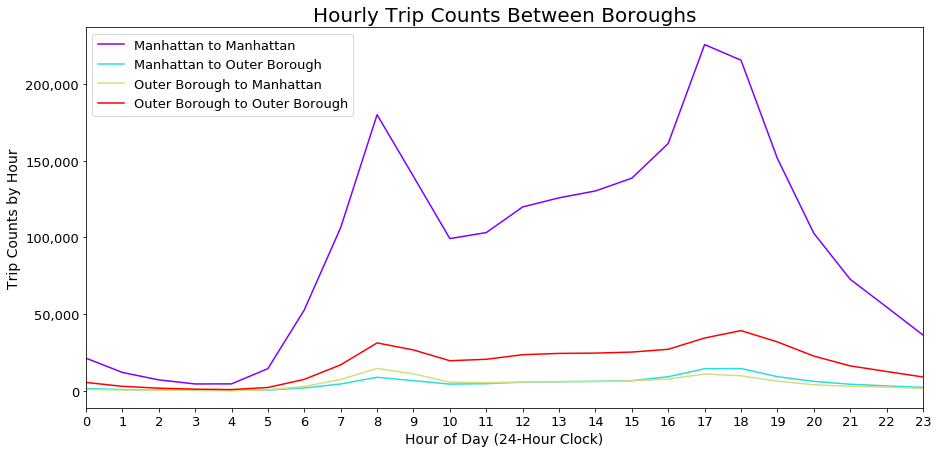

In [141]:
boro_flow = pivot_cb.pivot_table('bikeid', index='starthour', columns=['start_boro_flow','end_boro_flow'], aggfunc='count', fill_value=0)
boro_flow_plt = boro_flow.plot(kind='line', figsize=(15,7), xticks = range(0,24), colormap='rainbow')
boro_flow_plt.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=14)
plt.ylabel('Trip Counts by Hour', fontsize=14)
plt.title('Hourly Trip Counts Between Boroughs', fontsize=20)
plt.legend(['Manhattan to Manhattan','Manhattan to Outer Borough',
           'Outer Borough to Manhattan','Outer Borough to Outer Borough'], fontsize=13)
plt.show();

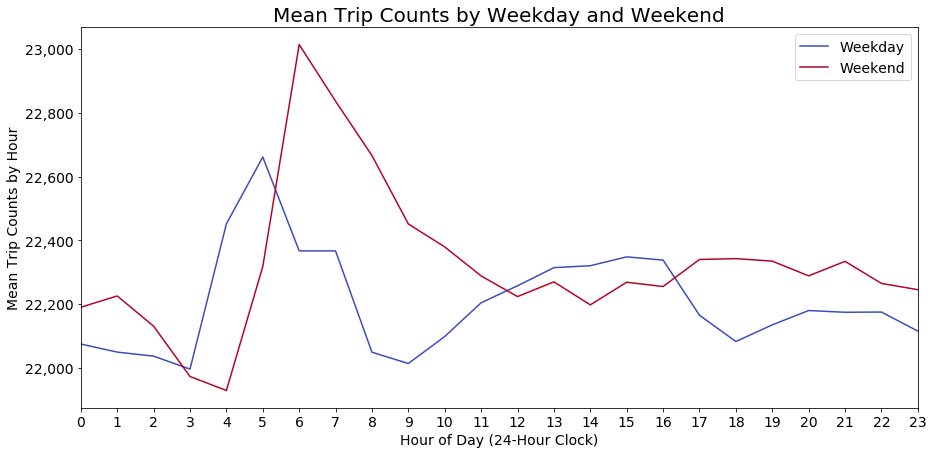

In [142]:
daytype_mean_trips = pivot_cb.pivot_table('bikeid', index='starthour', columns='startdaytype', aggfunc='mean')
daytype_plt = daytype_mean_trips.plot(kind='line', figsize = (15,7), xticks=range(0,24), fontsize = 14, colormap='coolwarm')
daytype_plt.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Hour of Day (24-Hour Clock)', fontsize=14)
plt.ylabel('Mean Trip Counts by Hour', fontsize=14)
plt.title('Mean Trip Counts by Weekday and Weekend', fontsize=20)
plt.legend(['Weekday','Weekend'], fontsize=14)
plt.show();

In [130]:
count_nb_startdaytype = pivot_cb.pivot_table('bikeid', index='startneighborhood', columns='startdaytype', aggfunc='count', fill_value=0)
count_nb_startdaytype = count_nb_startdaytype.applymap('{0:,.0f}'.format)
count_nb_startdaytype.loc[count_nb_startdaytype.index == 'Chelsea']

startdaytype,Weekday,Weekend
startneighborhood,,
Chelsea,"240,851","65,276"


In [129]:
count_nb_enddaytype = pivot_cb.pivot_table('bikeid', index='endneighborhood', columns='enddaytype', aggfunc='count', fill_value=0)
count_nb_enddaytype = count_nb_enddaytype.applymap('{0:,.0f}'.format)
count_nb_enddaytype.loc[count_nb_enddaytype.index == 'Chelsea']

enddaytype,Weekday,Weekend
endneighborhood,,
Chelsea,"240,666","67,297"


Outflow:

In [110]:
net_outflow_day.loc[net_outflow_day.index == 'Chelsea']

Day Type,Weekday,Weekend
Neighborhood,,
Chelsea,185.0,-2021.0


In [111]:
net_outflow_gender.loc[net_outflow_gender.index == 'Chelsea']

,Male,Female
Neighborhood,,
Chelsea,483.0,-2361.0


In [125]:
net_outflow_age.loc[net_outflow_age.index == 'Chelsea']

age_group,20s,30s,40s,50s,60s+,Teens (16-19)
Neighborhood,,,,,,
Chelsea,-1726.0,-471.0,-167.0,-158.0,616.0,70.0


In [114]:
net_outflow_user[net_outflow_user.index == 'Chelsea']

usertype,Customer,Subscriber
Neighborhoods,,
Chelsea,62.0,-1930.0


Inflow:

In [117]:
net_inflow_day.loc[net_inflow_day.index == 'Chelsea']

Day Type,Weekday,Weekend
Neighborhood,,
Chelsea,-185.0,2021.0


In [119]:
net_inflow_gender.loc[net_inflow_gender.index == 'Chelsea']

,Male,Female
Neighborhood,,
Chelsea,-483.0,2361.0


In [126]:
net_inflow_age.loc[net_inflow_age.index == 'Chelsea']

age_group,20s,30s,40s,50s,60s+,Teens (16-19)
Neighborhood,,,,,,
Chelsea,1726.0,471.0,167.0,158.0,-616.0,-70.0


In [121]:
net_inflow_user[net_inflow_user.index == 'Chelsea']

usertype,Customer,Subscriber
Neighborhoods,,
Chelsea,-62.0,1930.0


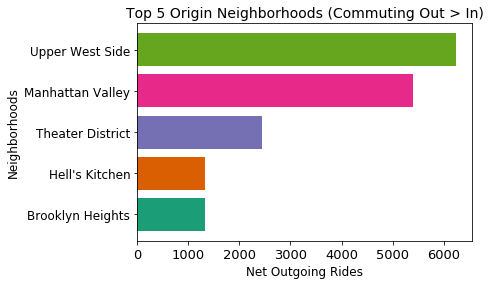

In [131]:
outf_plt = top5_hoods_outflow.sort_values(['Net Outflow of Rides'], ascending=True).dropna().head(5)
outf_plt = plt.barh(range(len(outf_plt)), outf_plt['Net Outflow of Rides'], color=plt.cm.Dark2(np.arange(len(outf_plt))))
plt.yticks([4,3,2,1,0], ["Upper West Side","Manhattan Valley", "Theater District","Hell's Kitchen","Brooklyn Heights"], fontsize=12)
plt.xlabel('Net Outgoing Rides', fontsize=12)
plt.ylabel('Neighborhoods', fontsize=12)
plt.title('Top 5 Origin Neighborhoods (Commuting Out > In)', fontsize=14) 
plt.show();

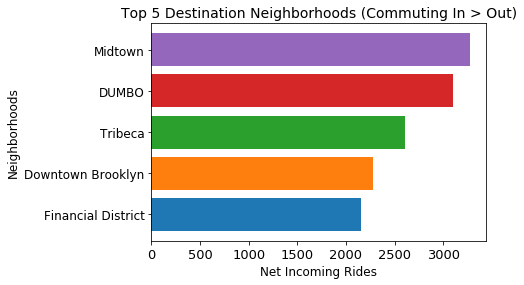

In [132]:
inf_plt = top5_hoods_inflow.sort_values(['Net Inflow of Rides'], ascending=True).dropna().head(5)
inf_plt = plt.barh(range(len(inf_plt)), inf_plt['Net Inflow of Rides'], color=plt.cm.tab10(np.arange(len(inf_plt))))
plt.yticks([4,3,2,1,0], ['Midtown','DUMBO','Tribeca','Downtown Brooklyn','Financial District'], fontsize=12)
plt.xlabel('Net Incoming Rides', fontsize=12)
plt.ylabel('Neighborhoods', fontsize=12)
plt.title('Top 5 Destination Neighborhoods (Commuting In > Out)', fontsize=14)  
plt.show();

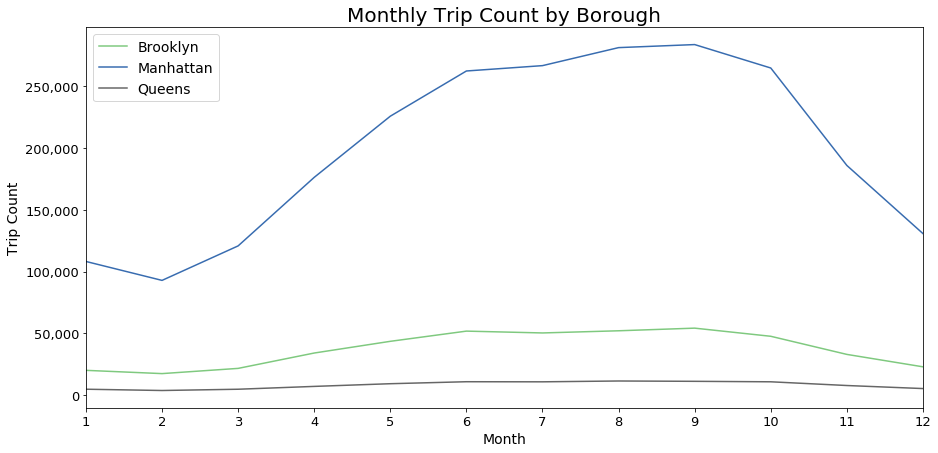

In [86]:
freq_plt = pivot_cb.pivot_table('bikeid', index='startmonth', columns='startboro', aggfunc='count', fill_value=0).plot(kind='line', colormap='Accent', figsize=(15,7), xticks = range(1,13))
freq_plt.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Month', fontsize=14)
plt.ylabel('Trip Count', fontsize=14)
plt.title('Monthly Trip Count by Borough', fontsize=20)
plt.legend(['Brooklyn','Manhattan','Queens'], fontsize=14)
plt.show();

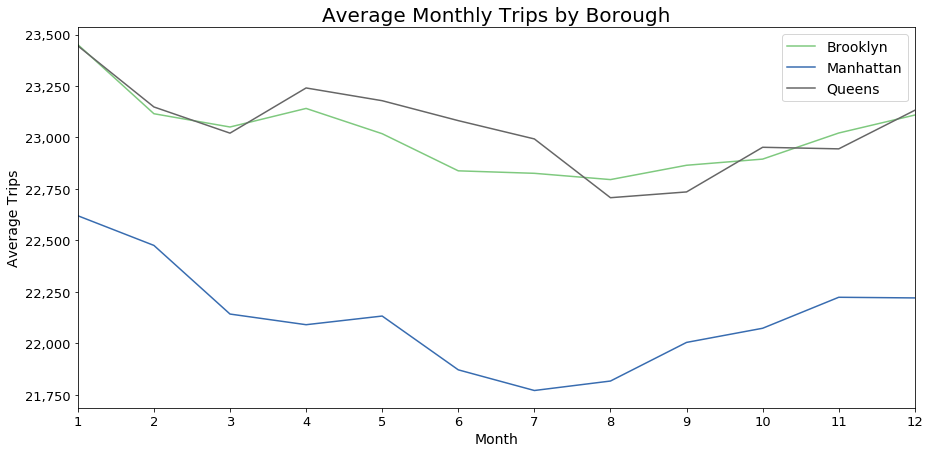

In [87]:
avg_trip_plt = pivot_cb.pivot_table('bikeid', index='startmonth', columns='startboro', aggfunc='mean', fill_value=0).plot(kind='line', colormap='Accent', figsize=(15,7), xticks = range(1,13))
avg_trip_plt.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Trips', fontsize=14)
plt.title('Average Monthly Trips by Borough', fontsize=20)
plt.legend(['Brooklyn','Manhattan','Queens'], fontsize=14)
plt.show();